# **MUSIC RECOMMENDATION SYSTEM**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mlt
from matplotlib import style

In [ ]:
musicdata = pd.read_csv("genres_v2.csv");

In [ ]:
musicdata.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [ ]:
musicdata.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


In [ ]:
musicdata.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [ ]:
musicdata['title'].isna().value_counts()

True     21525
False    20780
Name: title, dtype: int64

In [ ]:
df = musicdata.drop('song_name',axis=1)

In [ ]:
musicdata.shape

(42305, 22)

In [ ]:
musicdata.duplicated().sum()

0

In [ ]:
musicdata.drop_duplicates(inplace=True)

In [ ]:
musicdata.duplicated().sum()

0

In [ ]:
musicdata.isna().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [ ]:
musicdata.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


In [ ]:
musicdata['song_name'].isna().value_counts()

False    21519
True     20786
Name: song_name, dtype: int64

In [ ]:
corrilation_data = musicdata.corr()
corrilation_data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
danceability,1.000000,-0.323248,-0.012708,-0.216776,0.084413,0.182177,0.069910,-0.067114,-0.196702,0.369845,-0.165929,-0.049807,0.057711,-0.598250
energy,-0.323248,1.000000,0.044731,0.601540,-0.032203,-0.148363,-0.497334,0.303875,0.231754,-0.013520,-0.024504,0.294464,0.039781,0.214992
key,-0.012708,0.044731,1.000000,-0.006810,-0.248283,-0.030634,-0.004937,0.068266,0.002753,0.028600,-0.009862,0.069255,0.008061,-0.015318
loudness,-0.216776,0.601540,-0.006810,1.000000,-0.004744,0.048035,-0.283876,-0.187933,0.167104,0.080916,0.151610,-0.095999,0.047471,0.561957
mode,0.084413,-0.032203,-0.248283,-0.004744,1.000000,0.050260,-0.014514,-0.016402,0.007280,0.022208,-0.012191,-0.031253,-0.009317,-0.103831
speechiness,0.182177,-0.148363,-0.030634,0.048035,0.050260,1.000000,0.160184,-0.386571,0.057432,0.218829,0.164674,-0.309892,0.021637,0.183439
acousticness,0.069910,-0.497334,-0.004937,-0.283876,-0.014514,0.160184,1.000000,-0.261896,-0.107229,0.099328,0.055643,-0.246681,-0.049791,0.059326
instrumentalness,-0.067114,0.303875,0.068266,-0.187933,-0.016402,-0.386571,-0.261896,1.000000,-0.015990,-0.257068,-0.207667,0.603784,-0.010164,-0.452503
liveness,-0.196702,0.231754,0.002753,0.167104,0.007280,0.057432,-0.107229,-0.015990,1.000000,-0.025156,0.028327,0.010594,0.003077,0.174267
valence,0.369845,-0.013520,0.028600,0.080916,0.022208,0.218829,0.099328,-0.257068,-0.025156,1.000000,0.058374,-0.191093,0.040308,-0.229319


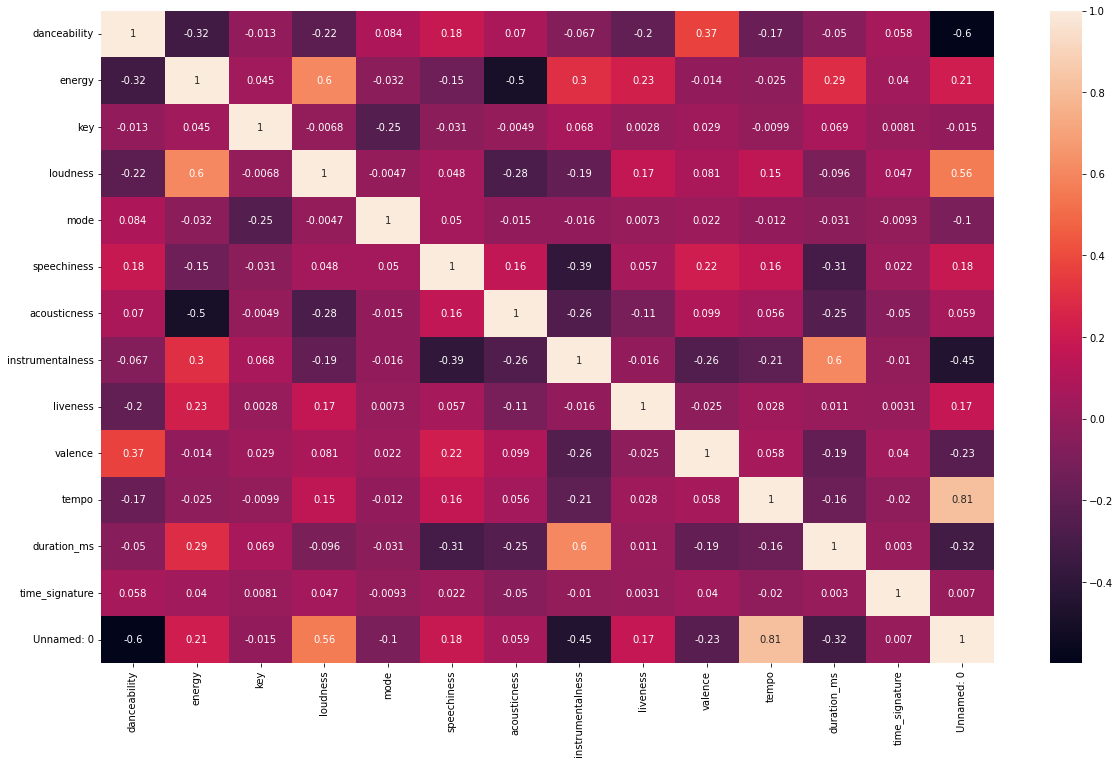

In [ ]:
mlt.figure (figsize=(20, 12))
sb.heatmap(corrilation_data,annot=True);

In [ ]:
musicdata.drop(['type'],axis=1,inplace=True)

In [ ]:
musicdata.dropna(subset=['song_name'],inplace=True)

In [ ]:
musicdata.shape

(21519, 21)

**DATA PREPROCESSING AND EDA**

In [ ]:
from sklearn import preprocessing
import math

In [ ]:
feature_cols = ['energy','loudness','valence','danceability','acousticness','instrumentalness','speechiness','tempo']

In [ ]:
normalized = preprocessing.normalize(musicdata[feature_cols])
normalized = pd.DataFrame(normalized,columns=feature_cols)

In [ ]:
normalized['mean']  = normalized.mean(axis =1)

In [ ]:
from scipy.stats import skewnorm
style.use('seaborn')

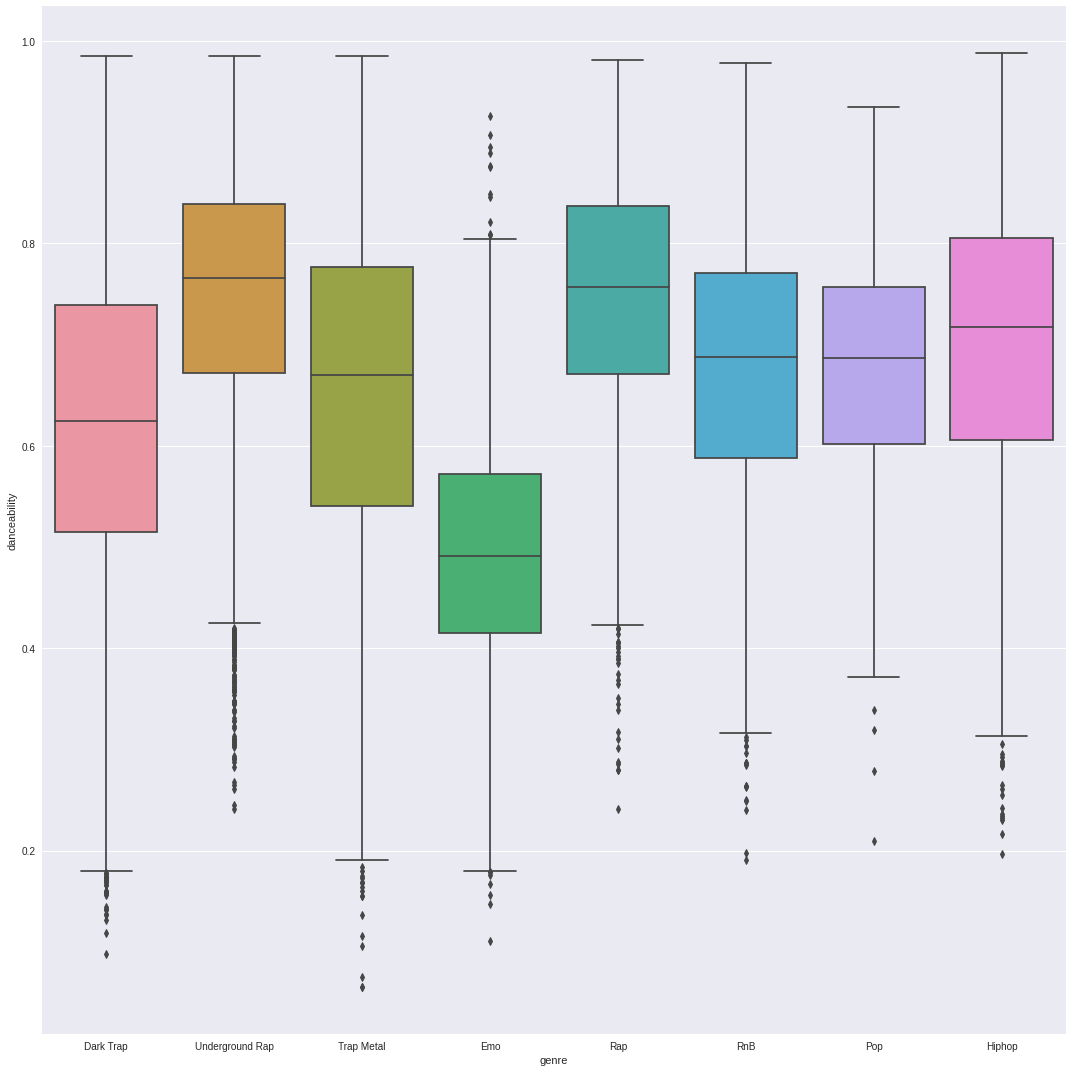

In [ ]:
sb.catplot(data=musicdata,x='genre',y= 'danceability',kind='box',height=15)

Skewness

In [ ]:
def FindSkewness(value):
    if value > 0: 
        return 'Positive Skewness'
    elif value < 0:
        return'Negative Skewness'
    return 'No Skewness'

In [ ]:
musicSkewness = musicdata.skew(axis=0)

musicSkewness = np.round(musicSkewness,decimals=2)

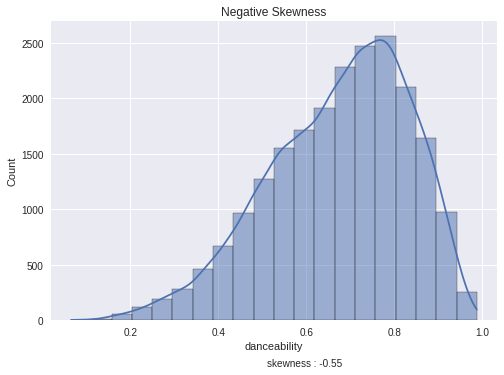

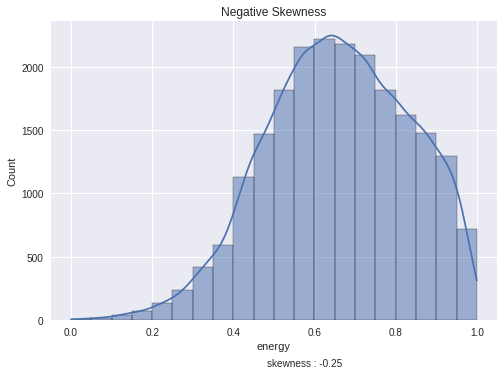

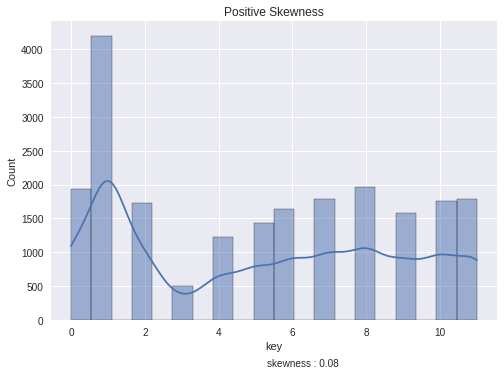

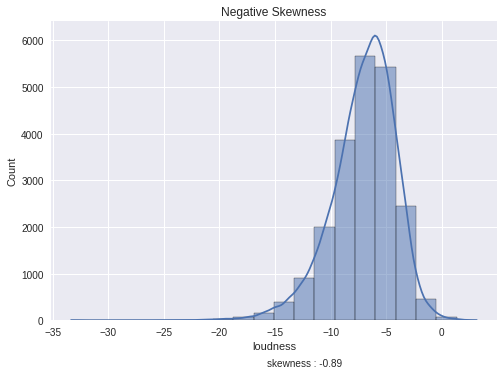

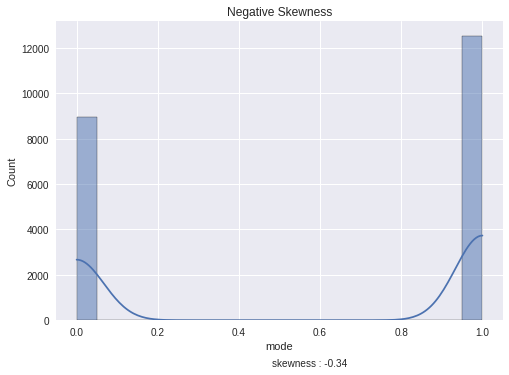

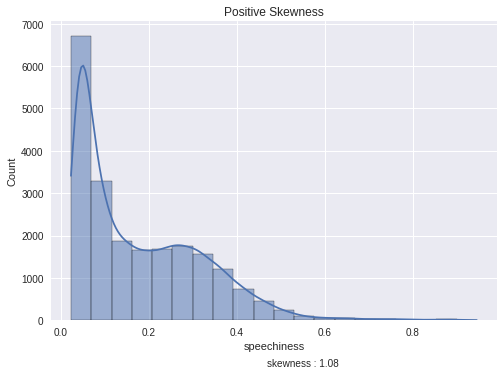

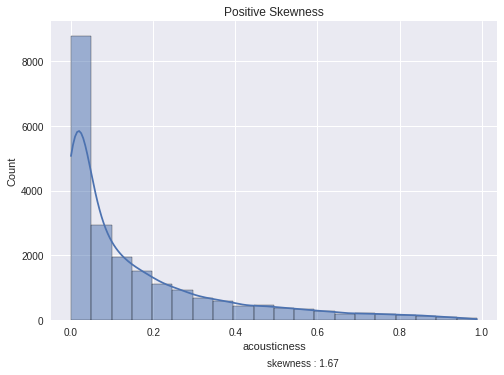

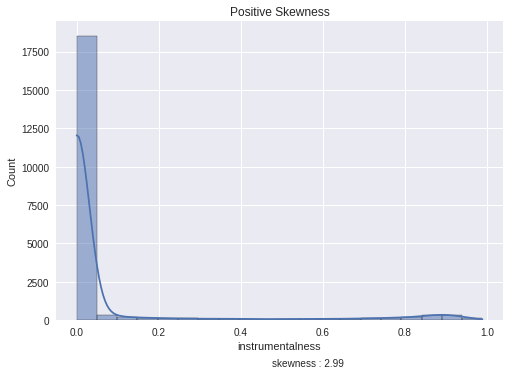

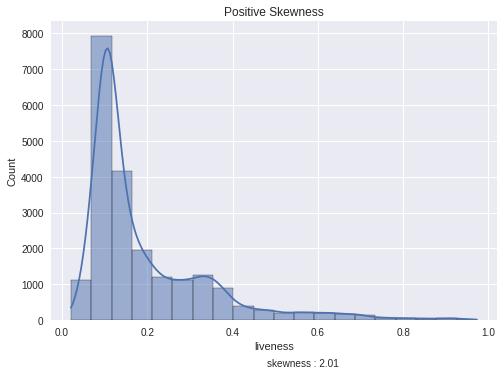

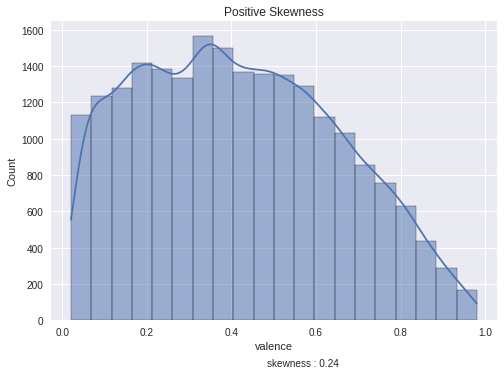

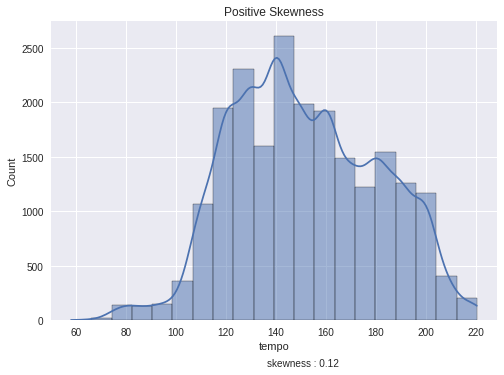

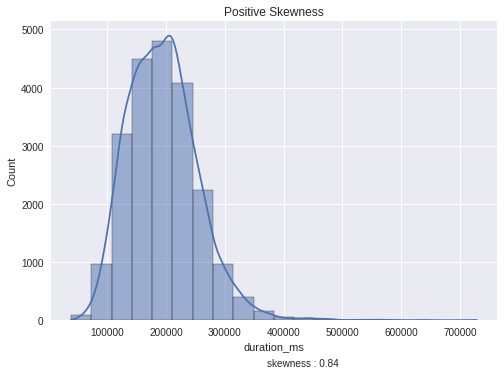

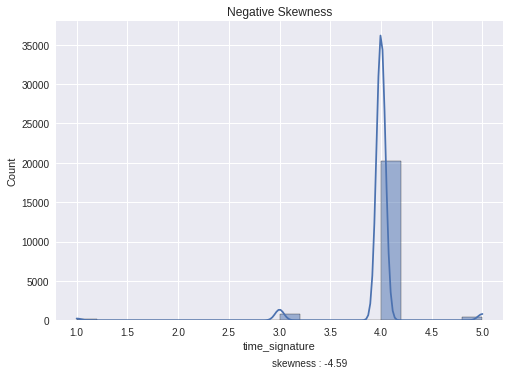

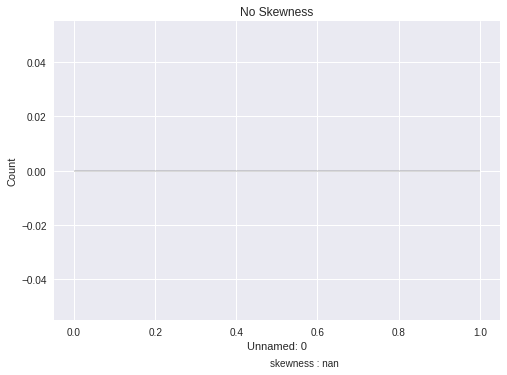

In [ ]:
numeric_cols  = musicdata._get_numeric_data().columns.tolist()

for i, column in enumerate(numeric_cols):
    sb.histplot(musicdata[column],bins = 20,kde = True);
    conclusion = FindSkewness(musicSkewness[i])
    mlt.title(conclusion)
    mlt.figtext(0.5,0.01,f"skewness : {musicSkewness[i]}")
    mlt.show()

Model Building (External Functions)

In [ ]:
def getSongIndex(songName):
    
    bool = musicdata['song_name'].isin([songName])
    # Getting Index Of Song If Present
    sindex = bool[bool==True].index[0]
    return sindex

In [ ]:
songName = 'Symbiote'

**MODEL BUILDING USING CLUSTERING**

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
linear_kernal = linear_kernel(normalized)
euclidian = euclidean_distances(normalized)
consine = cosine_similarity(normalized)

In [ ]:
def recommendation(m_name,model =linear_kernal):
    # default model is linear kernal 
    SongIndex = getSongIndex(m_name)
    score = list(enumerate(model[SongIndex]))
    sim_score = sorted(score,key = lambda x:x[1],reverse = True)
    sim_score = sim_score[1:11]
    Index = [i[0] for i in sim_score]
    return musicdata["song_name"].iloc[Index]

In [ ]:
musicdata.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539.0,4.0,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427.0,4.0,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821.0,4.0,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661.0,3.0,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298.0,4.0,Dark Trap,Venom,NaN,NaN


In [ ]:
recommendation(songName)

69                     Magazine
2166                   Magazine
1548                    Enemies
1621                       Yeah
353                        Mrs.
1260    2020 PHARMACY FREESTYLE
620               Bladed Choppa
856                 Dead Angels
1341                 Devil/skin
2112                        H2O
Name: song_name, dtype: object

In [ ]:
recommendation(songName,model =euclidian )

2887                            Intro
2754                        sacrifice
1367    SadlyThatsJustTheWayThingsAre
2971                           Shiver
3015                 End of Broadcast
2890                        Interlude
2744           last night (glo remix)
718               Doesithurttoloveme?
3025                          Wayward
1067                           Wither
Name: song_name, dtype: object

In [ ]:
recommendation(songName,model =consine )

586               Florida Thang
2044              Florida Thang
2276                         41
1474               Jeffer Drive
2224               Jeffer Drive
187                      PRBLMS
3224                     Narshe
2929               Become Again
1581                 Goth Bitch
629     Case 19 (feat. 6ix9ine)
Name: song_name, dtype: object

# **Genre Prediction**

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#Import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from scikitplot.metrics import plot_roc_curve

In [ ]:
data=pd.read_csv('genres_v2.csv')

In [ ]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [ ]:
data.shape

(42305, 22)

In [ ]:
data.head().T

,0,1,2,3,4
danceability,0.831,0.719,0.85,0.476,0.798
energy,0.814,0.493,0.893,0.781,0.624
key,2,8,5,0,2
loudness,-7.364,-7.23,-4.783,-4.71,-7.668
mode,1,1,1,1,1
speechiness,0.42,0.0794,0.0623,0.103,0.293
acousticness,0.0598,0.401,0.0138,0.0237,0.217
instrumentalness,0.0134,0.0,0.000004,0.0,0.0
liveness,0.0556,0.118,0.372,0.114,0.166
valence,0.389,0.124,0.0391,0.175,0.591


In [ ]:
data["genre"].value_counts()

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre, dtype: int64

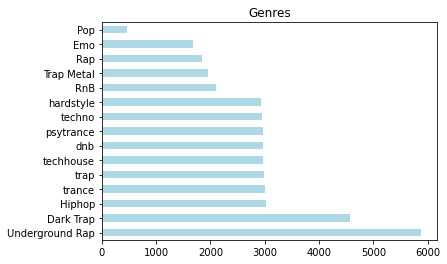

In [ ]:
data["genre"].value_counts().plot(kind="barh",color=["lightblue"],title="Genres");

In [ ]:
data.isna().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

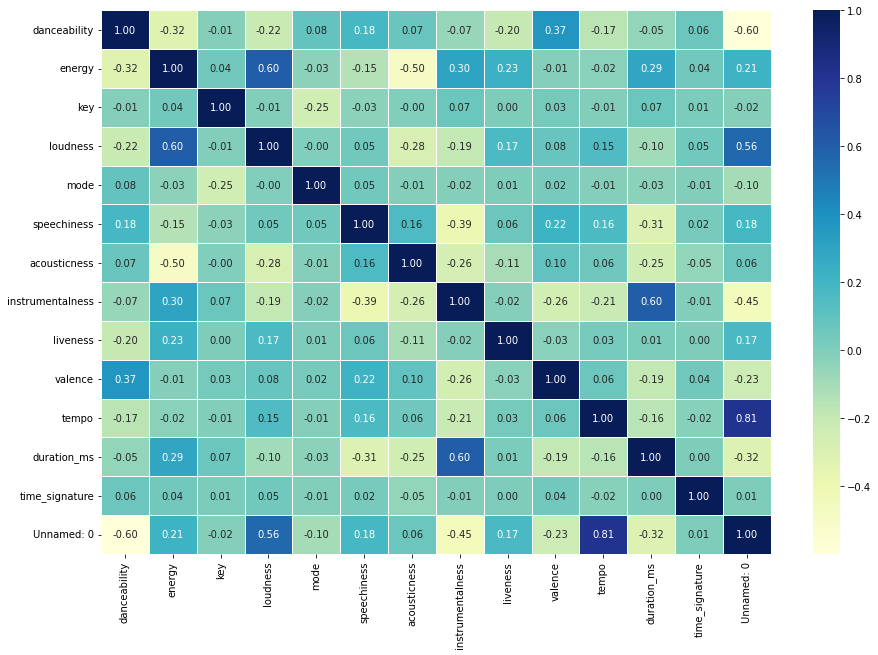

In [ ]:
corr_matrix=data.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu");

In [ ]:
num_data=data.drop(["title","Unnamed: 0","song_name","analysis_url","track_href","uri","id","type"],axis=1) #drop all non-numeric columns
X=num_data.drop("genre",axis=1)
y=num_data["genre"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

We will use 3 different models for this problem:
1. Logistic regression
2. K-Nearest
3. Random Forest

In [ ]:
models={"LogReg":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}
def fit_and_score (models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models
    """
    np.random.seed(1)
    model_scores={}
    for name , model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [ ]:
model_scores=fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

{'LogReg': 0.23141472639167948,
 'KNN': 0.3091833116652878,
 'Random Forest': 0.6669424417917503}

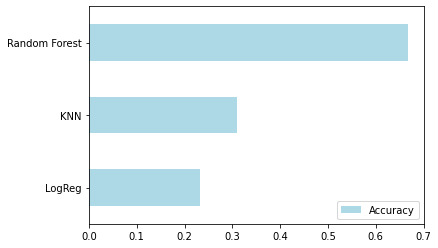

In [ ]:
model_compare=pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot.barh(color=["lightblue"]);